<a href="https://colab.research.google.com/github/najiaahmedd/CIND820_InitialResults/blob/main/ClusteringPt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
data1<-read.csv("projectfiles.csv")

In [71]:
install.packages("mice")
library(mice)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [72]:
dataclean<-subset(data1, select = c(Year,Disaster.Group,Disaster.Subgroup, Disaster.Type, Disaster.Subtype, Country, Region, Total.Deaths, No.Injured, No.Affected, No.Homeless, Total.Affected, Total.Damages...000.US.., Reconstruction.Costs...000.US.., Insured.Damages...000.US..))

In [73]:
dataclean1<-subset(data1, select = c(Year,Total.Deaths, No.Injured, No.Affected, No.Homeless, Total.Affected, Total.Damages...000.US.., Reconstruction.Costs...000.US.., Insured.Damages...000.US..))

In [74]:
data2<-subset(dataclean, select = c(Year,Disaster.Group,Disaster.Subgroup, Disaster.Type, Disaster.Subtype, Country, Region, Total.Deaths, No.Injured, No.Homeless, Total.Affected, Total.Damages...000.US.., Reconstruction.Costs...000.US.., Insured.Damages...000.US..))

In [75]:
head(data2)

,Year,Disaster.Group,Disaster.Subgroup,Disaster.Type,Disaster.Subtype,Country,Region,Total.Deaths,No.Injured,No.Homeless,Total.Affected,Total.Damages...000.US..,Reconstruction.Costs...000.US..,Insured.Damages...000.US..
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1970,Natural,Hydrological,Flood,,Argentina,South America,36,NA,NA,NA,25000,NA,NA
2,1970,Natural,Meteorological,Storm,Tropical cyclone,Australia,Australia and New Zealand,13,NA,NA,NA,72475,NA,NA
3,1970,Natural,Hydrological,Flood,,Benin,Western Africa,NA,NA,NA,NA,200,NA,NA
4,1970,Natural,Meteorological,Storm,Tropical cyclone,Bangladesh,Southern Asia,300000,NA,NA,3648000,86400,NA,NA
5,1970,Natural,Meteorological,Storm,,Bangladesh,Southern Asia,17,NA,NA,110,NA,NA,NA
6,1970,Natural,Hydrological,Flood,,Bangladesh,Southern Asia,NA,NA,NA,10000000,25000,NA,NA


In [76]:
data2$Year <- as.character(data2$Year)
head(data2)

,Year,Disaster.Group,Disaster.Subgroup,Disaster.Type,Disaster.Subtype,Country,Region,Total.Deaths,No.Injured,No.Homeless,Total.Affected,Total.Damages...000.US..,Reconstruction.Costs...000.US..,Insured.Damages...000.US..
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1970,Natural,Hydrological,Flood,,Argentina,South America,36,NA,NA,NA,25000,NA,NA
2,1970,Natural,Meteorological,Storm,Tropical cyclone,Australia,Australia and New Zealand,13,NA,NA,NA,72475,NA,NA
3,1970,Natural,Hydrological,Flood,,Benin,Western Africa,NA,NA,NA,NA,200,NA,NA
4,1970,Natural,Meteorological,Storm,Tropical cyclone,Bangladesh,Southern Asia,300000,NA,NA,3648000,86400,NA,NA
5,1970,Natural,Meteorological,Storm,,Bangladesh,Southern Asia,17,NA,NA,110,NA,NA,NA
6,1970,Natural,Hydrological,Flood,,Bangladesh,Southern Asia,NA,NA,NA,10000000,25000,NA,NA


In [77]:
imputedData<-mice (data2, m=6, maxit=50, meth='pmm', seed=600)


 iter imp variable
  1   1  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...000.US..  Reconstruction.Costs...000.US..  Insured.Damages...000.US..
  1   2  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...000.US..  Reconstruction.Costs...000.US..  Insured.Damages...000.US..
  1   3  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...000.US..  Reconstruction.Costs...000.US..  Insured.Damages...000.US..
  1   4  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...000.US..  Reconstruction.Costs...000.US..  Insured.Damages...000.US..
  1   5  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...000.US..  Reconstruction.Costs...000.US..  Insured.Damages...000.US..
  1   6  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...000.US..  Reconstruction.Costs...000.US..  Insured.Damages...000.US..
  2   1  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...

Warning message:
“Number of logged events: 47”


In [78]:
summary(imputedData)

Class: mids
Number of multiple imputations:  6 
Imputation methods:
                           Year                  Disaster.Group 
                             ""                              "" 
              Disaster.Subgroup                   Disaster.Type 
                             ""                              "" 
               Disaster.Subtype                         Country 
                             ""                              "" 
                         Region                    Total.Deaths 
                             ""                           "pmm" 
                     No.Injured                     No.Homeless 
                          "pmm"                           "pmm" 
                 Total.Affected        Total.Damages...000.US.. 
                          "pmm"                           "pmm" 
Reconstruction.Costs...000.US..      Insured.Damages...000.US.. 
                          "pmm"                           "pmm" 
PredictorMatrix:
     

In [79]:
completedata<-complete(imputedData, 1)
head(completedata)
dataclean$Year <- as.integer(dataclean$Year)

,Year,Disaster.Group,Disaster.Subgroup,Disaster.Type,Disaster.Subtype,Country,Region,Total.Deaths,No.Injured,No.Homeless,Total.Affected,Total.Damages...000.US..,Reconstruction.Costs...000.US..,Insured.Damages...000.US..
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1970,Natural,Hydrological,Flood,,Argentina,South America,36,200,26923,423,25000,194000,10000
2,1970,Natural,Meteorological,Storm,Tropical cyclone,Australia,Australia and New Zealand,13,1,200,35020,72475,1510,60000
3,1970,Natural,Hydrological,Flood,,Benin,Western Africa,9,26,826,450,200,150000,60000
4,1970,Natural,Meteorological,Storm,Tropical cyclone,Bangladesh,Southern Asia,300000,5933,300000,3648000,86400,194000,115000
5,1970,Natural,Meteorological,Storm,,Bangladesh,Southern Asia,17,12,75,110,210000,194000,200500
6,1970,Natural,Hydrological,Flood,,Bangladesh,Southern Asia,6908,155715,125000,10000000,25000,9450000,400000


In [83]:
library(dplyr)
library(ggplot2)
df<-completedata %>% count(Country, Disaster.Type, sort = TRUE)
df1<-completedata %>% count(Year, Disaster.Type, sort = TRUE)
df
# The table shows that storms occur the most with flood coming in second place
# The US has the most reported cases of storms followed by Phillipines then China
# China shows up quite a few times and they experience storms, floods and earthquakes 
# Can infer from this data that storms / floods are more likely to occur (based on historical data)

Country,Disaster.Type,n
<chr>,<chr>,<int>
United States of America (the),Storm,589
Philippines (the),Storm,335
China,Storm,309
China,Flood,292
India,Flood,275
Indonesia,Flood,235
United States of America (the),Flood,186
India,Storm,173
China,Earthquake,158


Year,Disaster.Type,n
<chr>,<chr>,<int>
2006,Flood,226
2007,Flood,218
2020,Flood,201
2019,Flood,196
2005,Flood,193
2010,Flood,184
2002,Flood,172
2008,Flood,165
2015,Flood,161


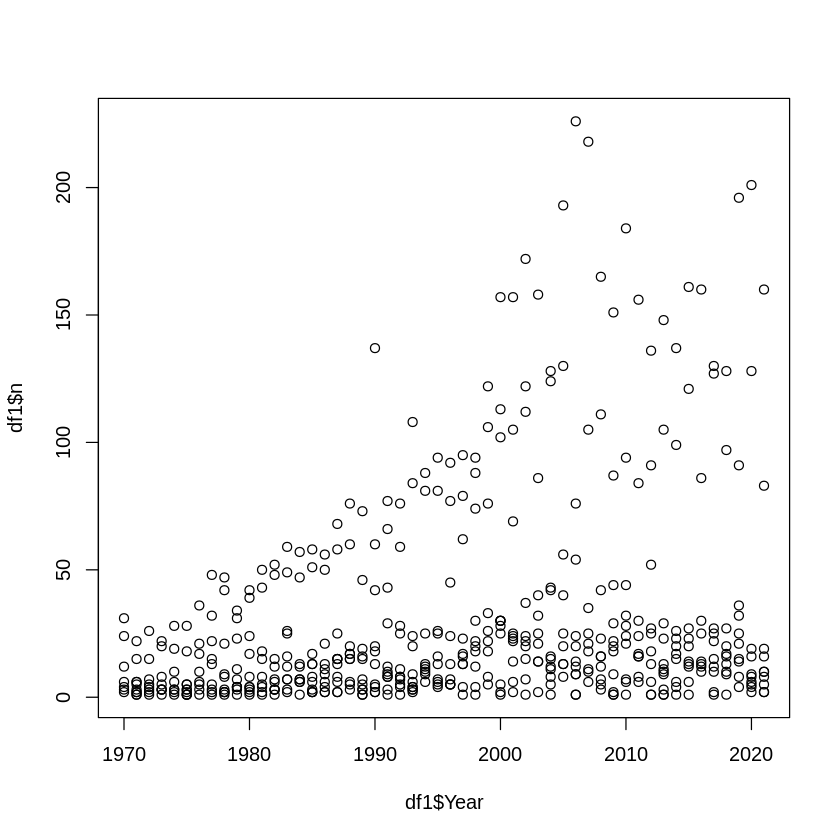

In [90]:
df1
# The table was created to see if it is true that frequency of floods and storms are increasing
# 2019 and 20202 <- which was very recent are in the top 5 years for floods
# Can we visualize this
plot(df1$Year, df1$n)
#The graph is very dense at the beginning indicating that natural disasters weren't as prominent
#As years go on, there are many disasters that have over 50+ occurences in one year
#We can infer that natural disasters are trending upwards from this